In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns

plt.style.use('ggplot')

from seaborn import distplot
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

import string
from imblearn.over_sampling import SMOTE


%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


# EDA

In [21]:
kpop = pd.read_csv('data/kpop_song_features.csv', index_col = 0)
kpop2 = pd.read_csv('data/kpop_song_features2.csv', index_col = 0)
kpop3 = pd.read_csv('data/kpop_song_features3.csv', index_col = 0)


apop = pd.read_csv('data/apop_song_features.csv', index_col = 0)
apop2 = pd.read_csv('data/apop_song_features2.csv', index_col = 0)
apop3 = pd.read_csv('data/apop_song_features3.csv', index_col = 0)

In [22]:
kpop_df = pd.concat([kpop, kpop2, kpop3])
apop_df = pd.concat([apop, apop2, apop3])

In [23]:
kpop_df = kpop_df[kpop_df.release_date != '0000']
apop_df = apop_df[apop_df.release_date != '0000']

In [24]:
kpop_df['release_date'] = pd.to_datetime(kpop_df['release_date'])
kpop_df['year'] = [i.year for i in kpop_df.release_date]


apop_df['release_date'] = pd.to_datetime(apop_df['release_date'])
apop_df['year'] = [i.year for i in apop_df.release_date]

kpop_df['target'] = 1
apop_df['target'] = 0



In [25]:
kpop_df['artist_name'] = [i.lower().replace("'", '') for i in kpop_df.artist_name]
apop_df['artist_name'] = [i.lower().replace("'", '') for i in apop_df.artist_name]

In [26]:
kpop_df.head()

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_name,release_date,year,target
0,0.714,0.736,2,0.0457,0.1910,0.000000,0.0553,0.814,149.985,210818,4,red velvet,2018-01-29,2018,1
1,0.721,0.924,7,0.0524,0.1350,0.000000,0.0427,0.801,124.024,229097,4,red velvet,2018-01-29,2018,1
2,0.839,0.902,1,0.0536,0.0868,0.002570,0.2720,0.639,114.953,189050,4,red velvet,2018-01-29,2018,1
3,0.761,0.785,7,0.0520,0.0792,0.000112,0.1420,0.780,111.037,245599,4,red velvet,2018-01-29,2018,1
4,0.686,0.752,7,0.0322,0.5860,0.000002,0.3640,0.906,149.998,188304,4,red velvet,2018-01-29,2018,1


In [27]:
pd.concat([kpop_df.artist_name.value_counts(), apop_df.artist_name.value_counts()])


ikon                   760
bigbang                671
2ne1                   531
shinee                 445
bts                    438
girls generation       349
exo                    285
twice                  251
gfriend                119
red velvet              95
wanna one               54
blackpink               36
*nsync                1350
bruno mars             831
lady gaga              705
taylor swift           696
kendrick lamar         695
rihanna                631
backstreet boys        606
katy perry             556
kelly clarkson         464
one direction          306
christina aguilera     271
Name: artist_name, dtype: int64

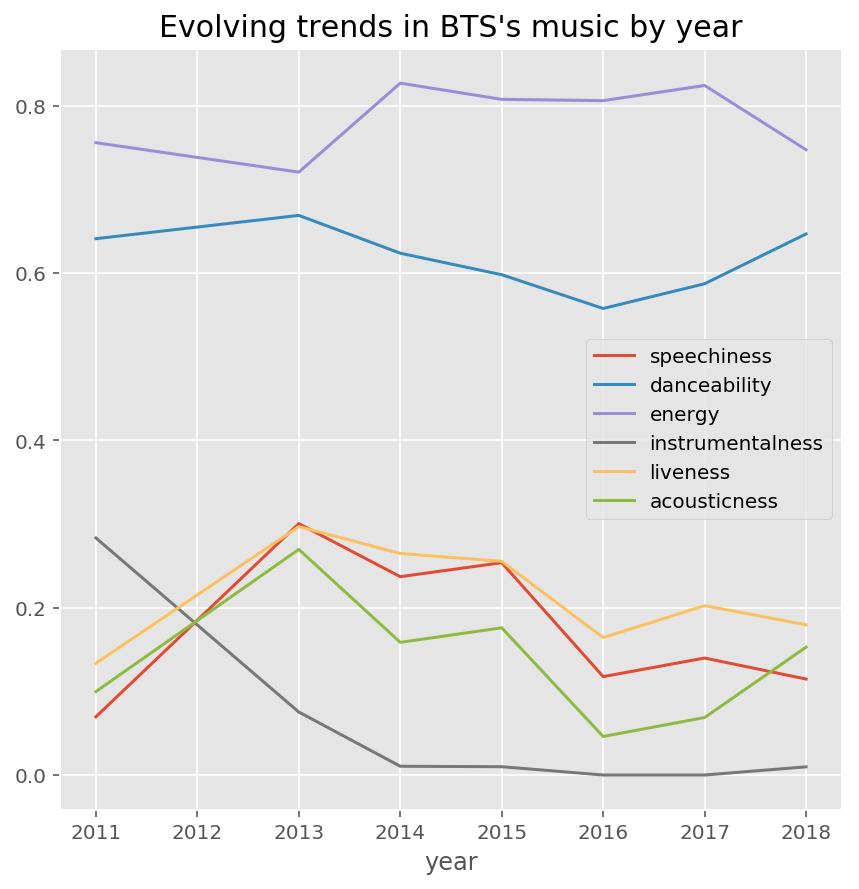

In [28]:
bts_grouped = kpop_df[kpop_df.artist_name == 'bts']

bts_grouped.groupby('year').agg({'speechiness':'mean', 'danceability':'mean', 'energy':'mean', 'instrumentalness':'mean', 'liveness':'mean', 'acousticness':'mean'}).plot(figsize = (7,7));
title('Evolving trends in BTS\'s music by year', size = 15);

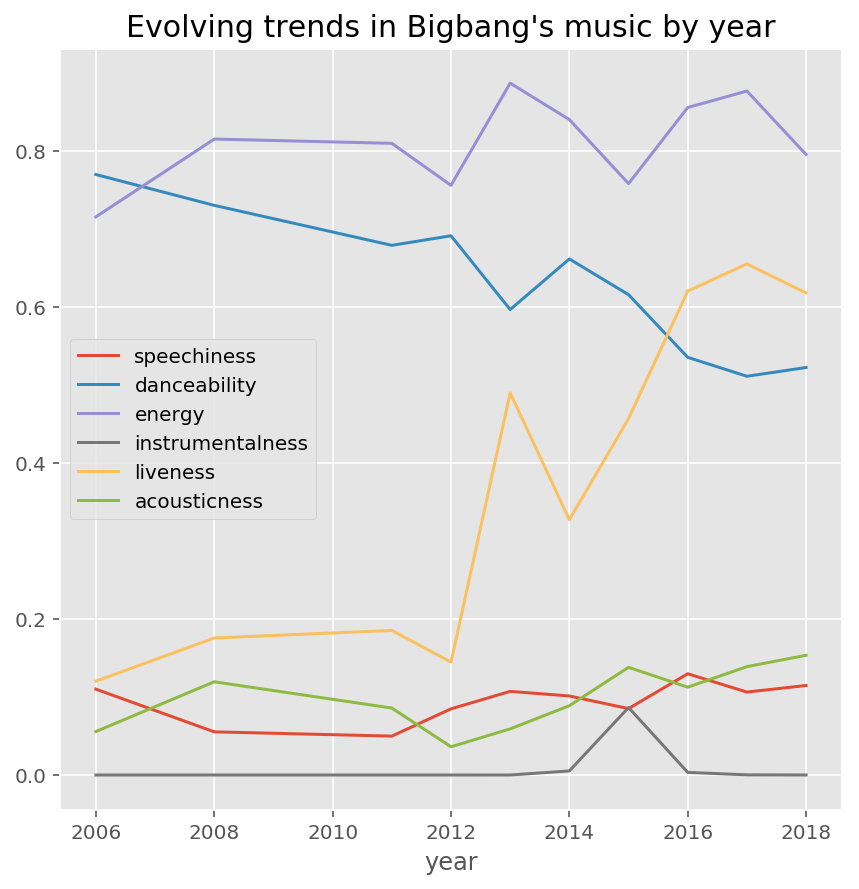

In [29]:
bigbang_grouped = kpop_df[kpop_df.artist_name == 'bigbang']
bigbang_grouped.groupby('year').agg({'speechiness':'mean', 'danceability':'mean', 'energy':'mean', 'instrumentalness':'mean', 'liveness':'mean', 'acousticness':'mean'}).plot(figsize = (7,7));
title('Evolving trends in Bigbang\'s music by year', size = 15);

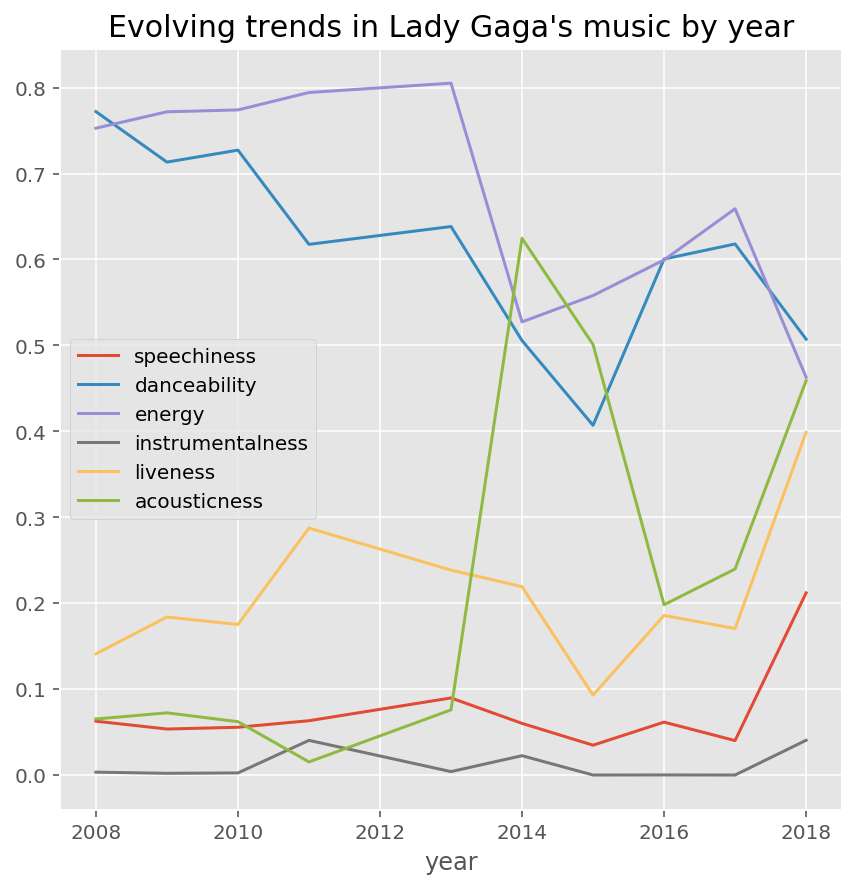

In [30]:
ladygaga_grouped = apop_df[apop_df.artist_name == 'lady gaga']
ladygaga_grouped.groupby('year').agg({'speechiness':'mean', 'danceability':'mean', 'energy':'mean', 'instrumentalness':'mean', 'liveness':'mean', 'acousticness':'mean'}).plot(figsize = (7,7));
title('Evolving trends in Lady Gaga\'s music by year', size = 15);

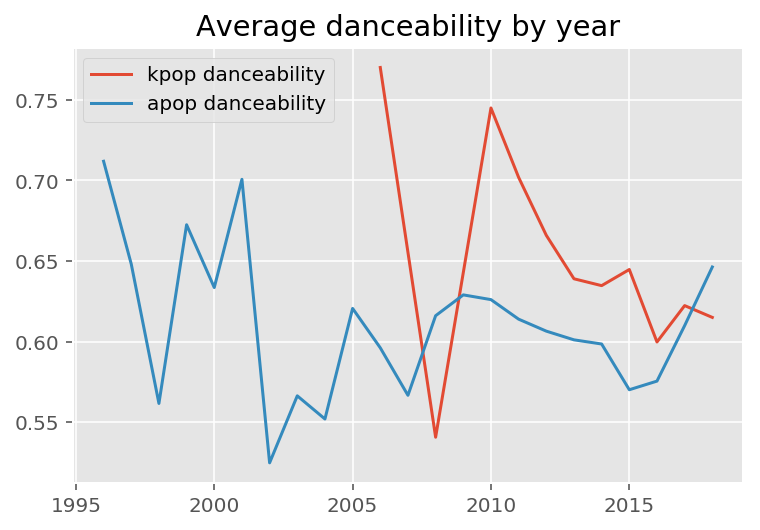

In [31]:

plt.subplot(1, 1, 1)
plot(kpop_df.groupby('year').agg({'danceability':'mean'}), label = 'kpop danceability');

plt.subplot(1, 1, 1)
plot(apop_df.groupby('year').agg({'danceability':'mean'}), label = 'apop danceability');
title('Average danceability by year')
legend();

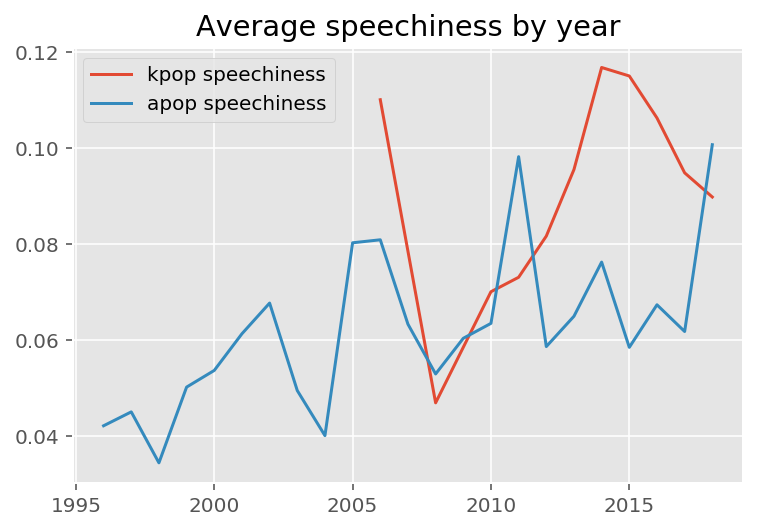

In [32]:

plt.subplot(1, 1, 1)
plot(kpop_df.groupby('year').agg({'speechiness':'mean'}), label = 'kpop speechiness');

plt.subplot(1, 1, 1)
plot(apop_df.groupby('year').agg({'speechiness':'mean'}), label = 'apop speechiness');
title('Average speechiness by year')
legend();

In [33]:
bts_tempo = kpop_df[kpop_df['artist_name'] == 'bts']['tempo']  
bigbang_tempo = kpop_df[kpop_df['artist_name'] == 'bigbang']['tempo']  
shinee_tempo = kpop_df[kpop_df['artist_name'] == 'shinee']['tempo']

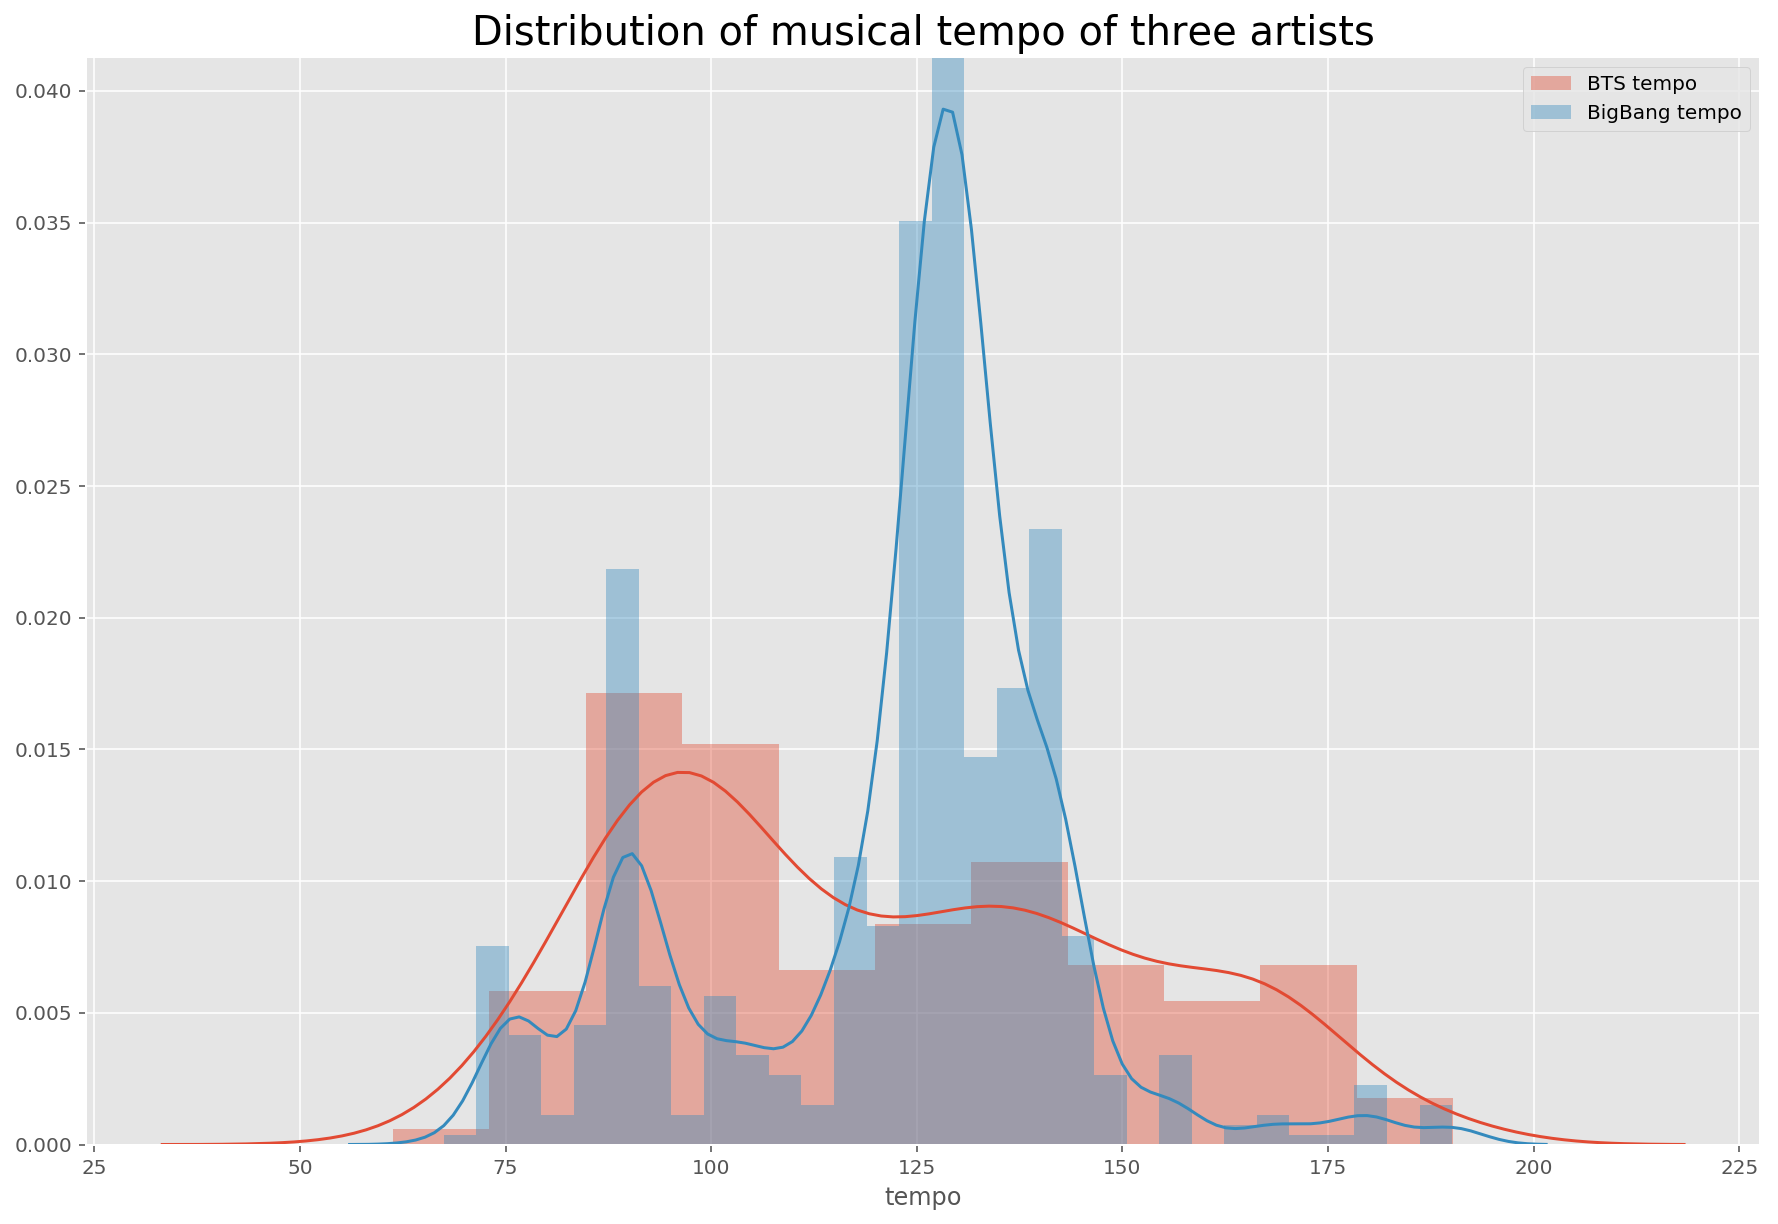

In [34]:
figure = figsize(15,10)
sns.distplot(bts_tempo, label = 'BTS tempo');
sns.distplot(bigbang_tempo, label = 'BigBang tempo');
title('Distribution of musical tempo of three artists', size = 20)
legend();

In [35]:
kpop_df.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean', 'valence':'mean'}).sort_values('speechiness', ascending = False)

,speechiness,instrumentalness,danceability,energy,acousticness,valence
artist_name,,,,,,
bts,0.172844,1.239960e-02,0.601454,0.801566,0.118142,0.547792
bigbang,0.108219,6.586041e-03,0.582627,0.832900,0.109640,0.439794
red velvet,0.094951,1.768199e-02,0.668874,0.748158,0.224725,0.627593
wanna one,0.094881,0.000000e+00,0.616815,0.787222,0.199652,0.551296
ikon,0.093867,2.812817e-02,0.630211,0.796621,0.191380,0.517419
2ne1,0.086835,2.792792e-02,0.655160,0.753032,0.120321,0.498756
exo,0.085738,4.107561e-02,0.628088,0.772642,0.172819,0.546436
shinee,0.083504,1.434579e-02,0.637085,0.807092,0.143948,0.586216
twice,0.082060,2.008758e-02,0.696681,0.827163,0.163619,0.612024


>BTS has the highest average in speechiness in their songs out of all the different groups, almost double of that of red velvet. BTS is relative high in their energy, but low in acousticness

In [36]:
apop_df.groupby('artist_name').agg({'speechiness':'mean', 'instrumentalness':'mean', 'danceability':'mean', 'energy':'mean','acousticness':'mean', 'valence':'mean'}).sort_values('energy', ascending = False)

,speechiness,instrumentalness,danceability,energy,acousticness,valence
artist_name,,,,,,
katy perry,0.061527,0.001338,0.632005,0.751266,0.088522,0.561482
one direction,0.049238,0.002887,0.588810,0.746526,0.122309,0.526785
backstreet boys,0.054636,0.011073,0.609911,0.721334,0.138418,0.562535
lady gaga,0.084522,0.015907,0.632386,0.705692,0.167523,0.521123
kelly clarkson,0.082163,0.007363,0.551369,0.702889,0.166611,0.446276
*nsync,0.058087,0.020642,0.606690,0.676935,0.224102,0.572906
rihanna,0.080839,0.011942,0.617027,0.675086,0.156436,0.491911
christina aguilera,0.108485,0.063259,0.612107,0.668288,0.238418,0.423379
kendrick lamar,0.126715,0.019961,0.683518,0.656447,0.192856,0.444866


>Katy Perry's songs have the highest average energy

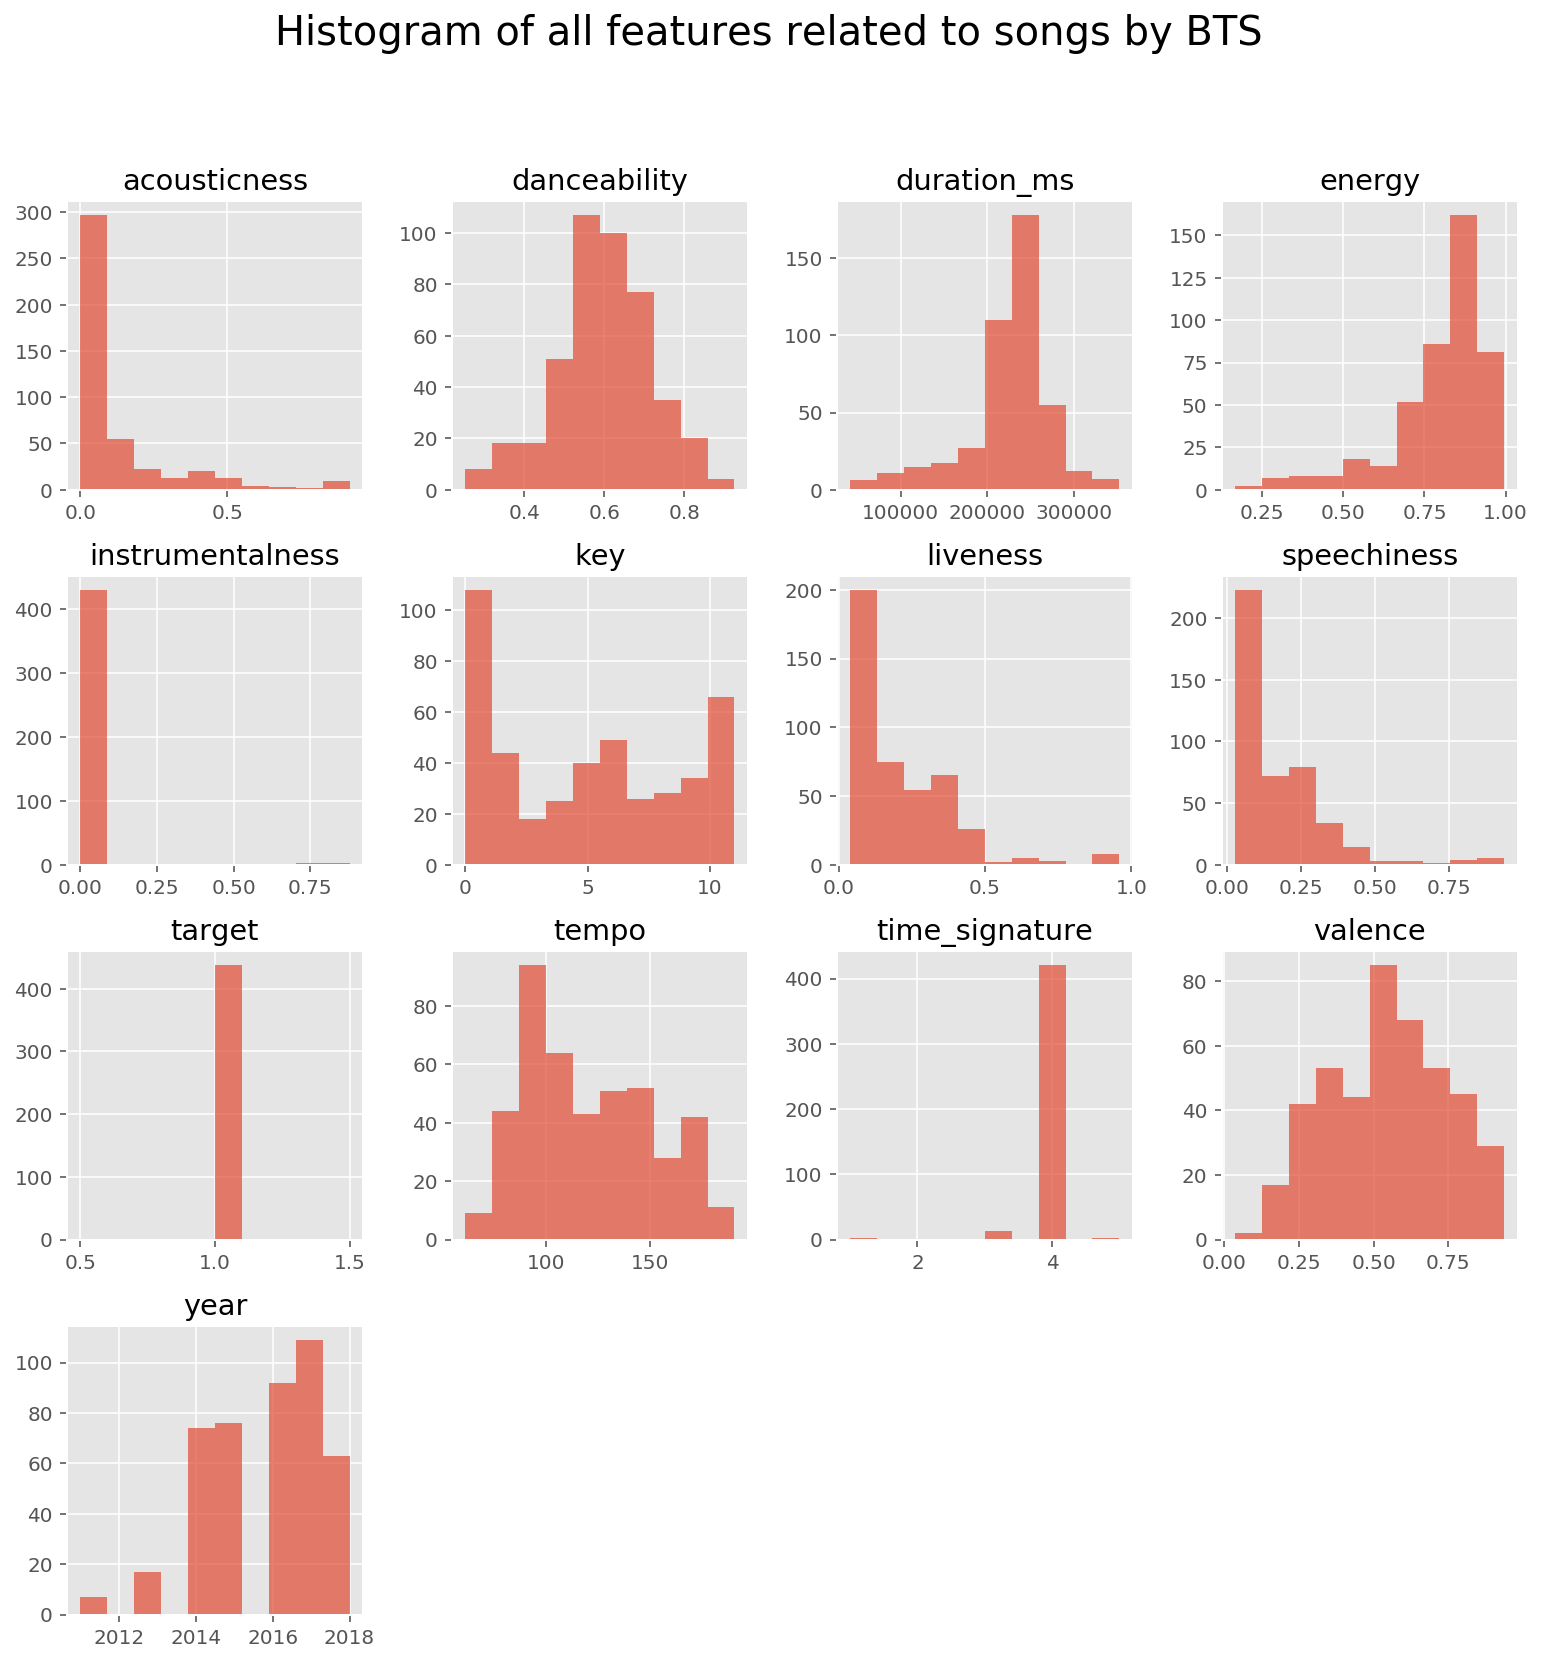

In [37]:
figure = figsize(13,13)
kpop_df[kpop_df.artist_name == 'bts']._get_numeric_data().hist(alpha = 0.7);
suptitle('Histogram of all features related to songs by BTS', size = 20);

# Baseline Modeling

In [38]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
import shap
from itertools import combinations


In [39]:
df = pd.concat([kpop_df, apop_df])
df = df.drop(['release_date','year','artist_name'], 1)

In [40]:
X_train, X_validation, y_train, y_validation = train_test_split(df.iloc[:,:-1], df.target, train_size=0.2)


In [41]:
X_train_lgbm = pd.get_dummies(X_train)
X_validation_lgbm = pd.get_dummies(X_validation)

In [42]:
X_train_lgbm.reset_index(inplace = True)
X_validation_lgbm.reset_index(inplace = True)

In [43]:
sm = SMOTE()

X_train_smote, y_train_smote = sm.fit_sample(X_train_lgbm, y_train.ravel())
X_validation_smote, y_validation_smote = sm.fit_sample(X_validation_lgbm, y_validation.ravel())

In [44]:
X_train_smote = pd.DataFrame(X_train_smote, columns = X_train_lgbm.columns).set_index('index')
X_validation_smote = pd.DataFrame(X_validation_smote, columns = X_validation_lgbm.columns).set_index('index')

In [45]:
model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.01,
                                   reg_alpha = 0.1, reg_lambda = 0.1, silent=True,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
model.fit(X_train_smote, y_train_smote,
           eval_set=[(X_validation_smote, y_validation_smote)],
           early_stopping_rounds=100,
eval_metric='auc',
verbose=200,)


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.858186	valid_0's binary_logloss: 0.490634
[400]	valid_0's auc: 0.879211	valid_0's binary_logloss: 0.442293
[600]	valid_0's auc: 0.890819	valid_0's binary_logloss: 0.419112
[800]	valid_0's auc: 0.8974	valid_0's binary_logloss: 0.40661
[1000]	valid_0's auc: 0.901558	valid_0's binary_logloss: 0.399268
[1200]	valid_0's auc: 0.904684	valid_0's binary_logloss: 0.394689
Early stopping, best iteration is:
[1200]	valid_0's auc: 0.904684	valid_0's binary_logloss: 0.394689


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.01,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=50, reg_alpha=0.1, reg_lambda=0.1,
        silent=True, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=0)

In [46]:
validation_pred_proba_grad = model.predict_proba(X_validation_smote)
roc_auc_score(y_validation_smote, validation_pred_proba_grad[:,1])

0.9046836431453263

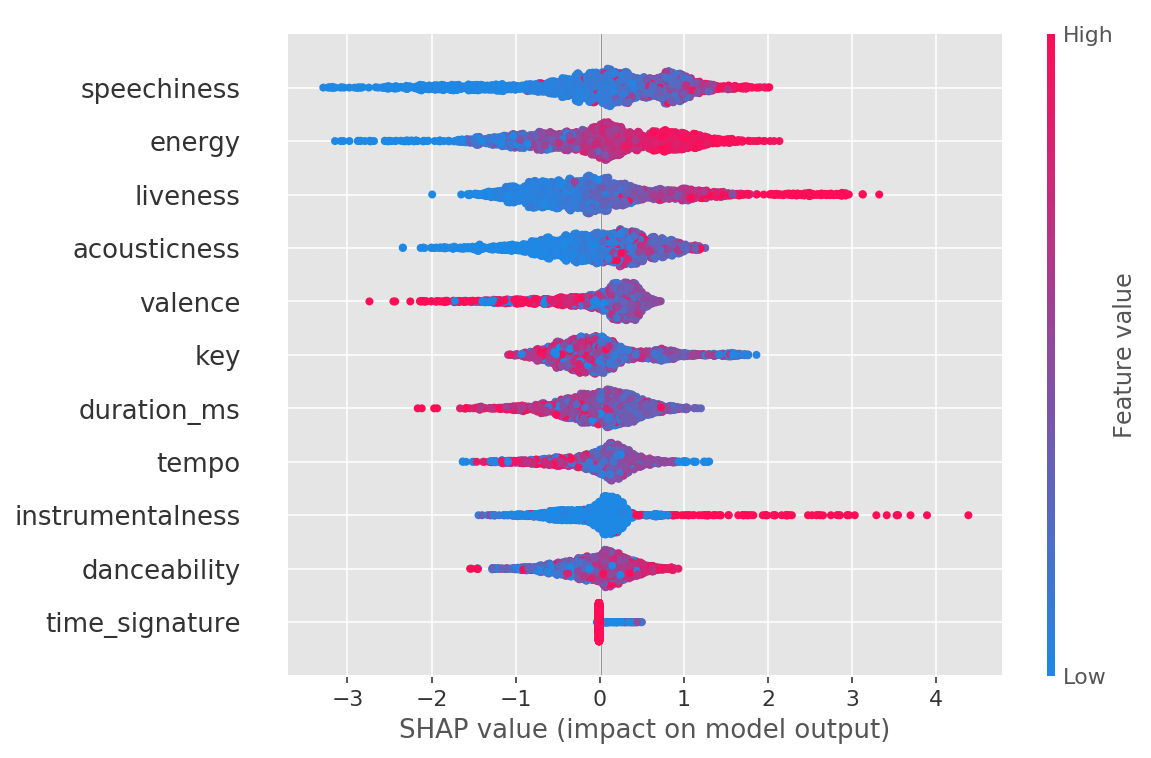

In [47]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_smote)

shap.summary_plot(shap_values, X_train_smote)

In [48]:
model2 = RandomForestClassifier()

model2.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
validation_pred_proba_grad = model2.predict_proba(X_validation_smote)
roc_auc_score(y_validation_smote, validation_pred_proba_grad[:,1])

0.8709949296582598

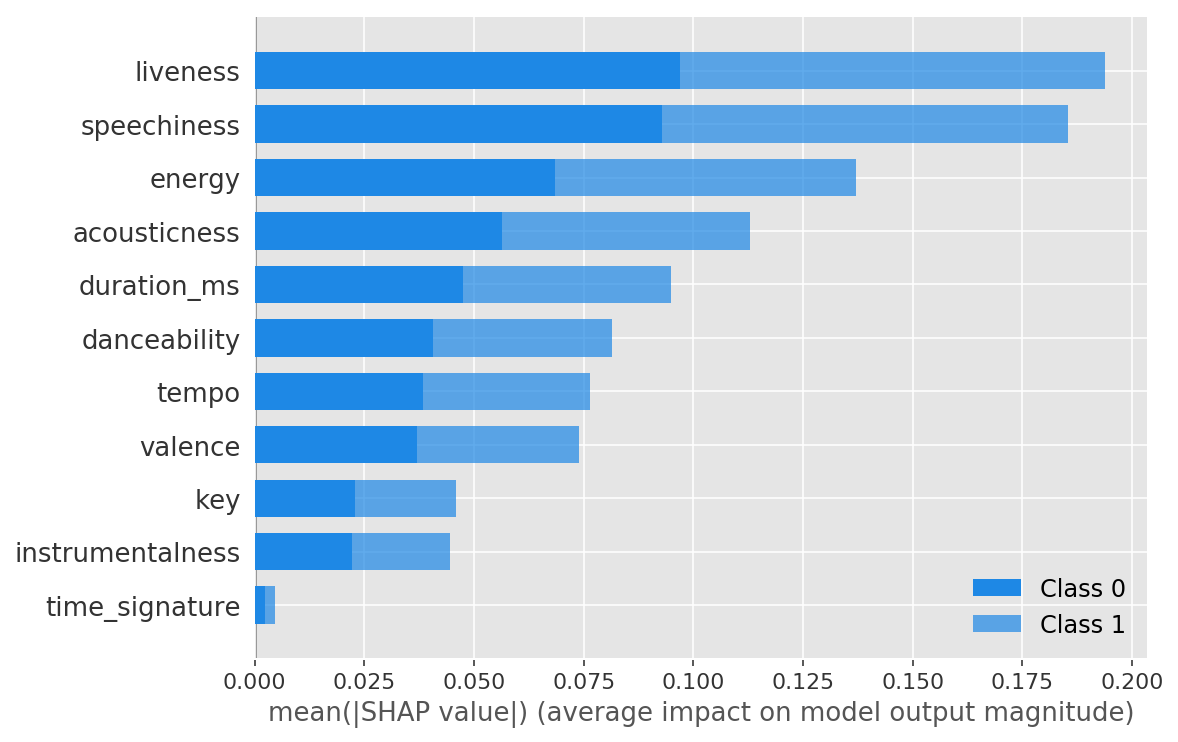

In [50]:
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X_train_smote)

shap.summary_plot(shap_values, X_train_smote)

# Comparing Kpop with American pop

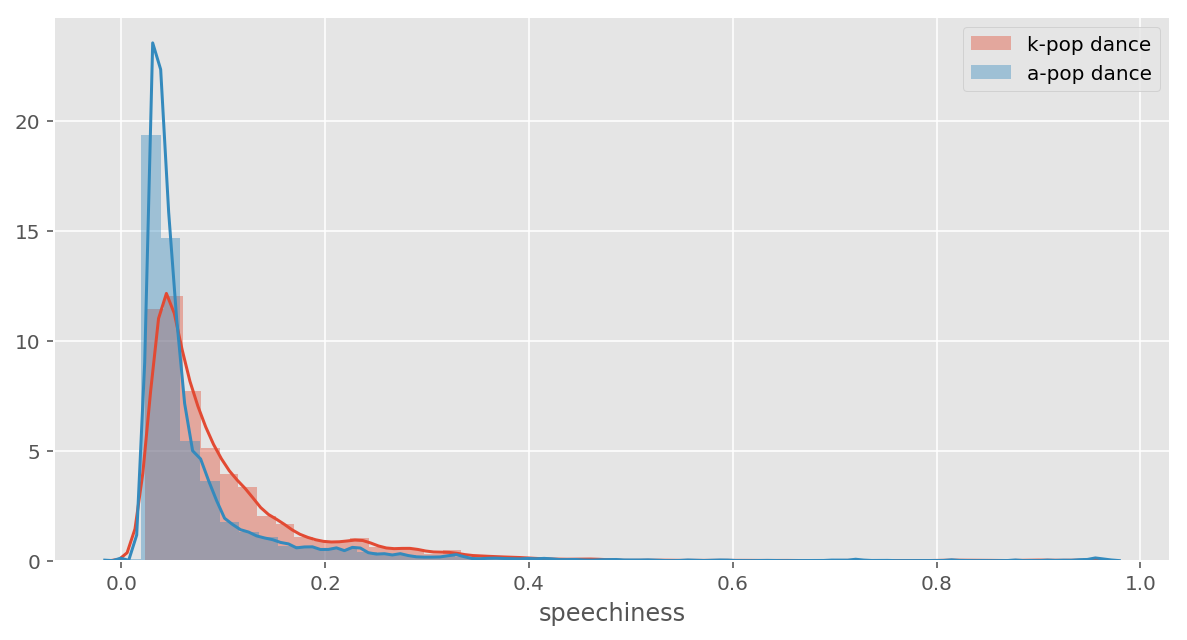

In [55]:
figure = figsize(10,5)
sns.distplot(df[df.target == 1]['speechiness'], label = 'k-pop dance');
sns.distplot(df[df.target == 0]['speechiness'], label = 'a-pop dance');
legend();

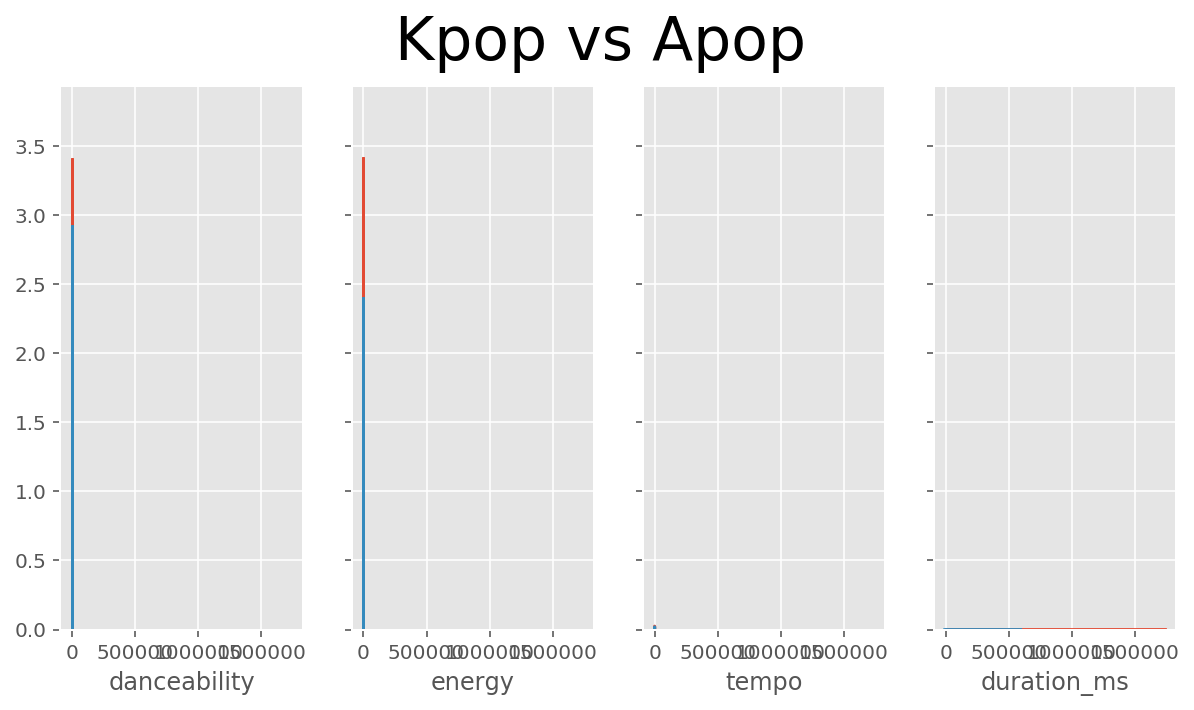

In [57]:
f, axes = subplots(1, 4, figsize=(10, 5), sharex=True, sharey = True)

sns.distplot(df[df.target == 1][df.columns[0]], ax = axes[0]);
sns.distplot(df[df.target == 0][df.columns[0]], ax = axes[0]);

sns.distplot(df[df.target == 1][df.columns[1]], ax = axes[1]);
sns.distplot(df[df.target == 0][df.columns[1]], ax = axes[1]);

sns.distplot(df[df.target == 1][df.columns[8]], ax = axes[2]);
sns.distplot(df[df.target == 0][df.columns[8]], ax = axes[2]);

sns.distplot(df[df.target == 1][df.columns[9]], ax = axes[3]);
sns.distplot(df[df.target == 0][df.columns[9]], ax = axes[3]);

suptitle('Kpop vs Apop', fontsize = 30);

OverflowError: cannot convert float infinity to integer

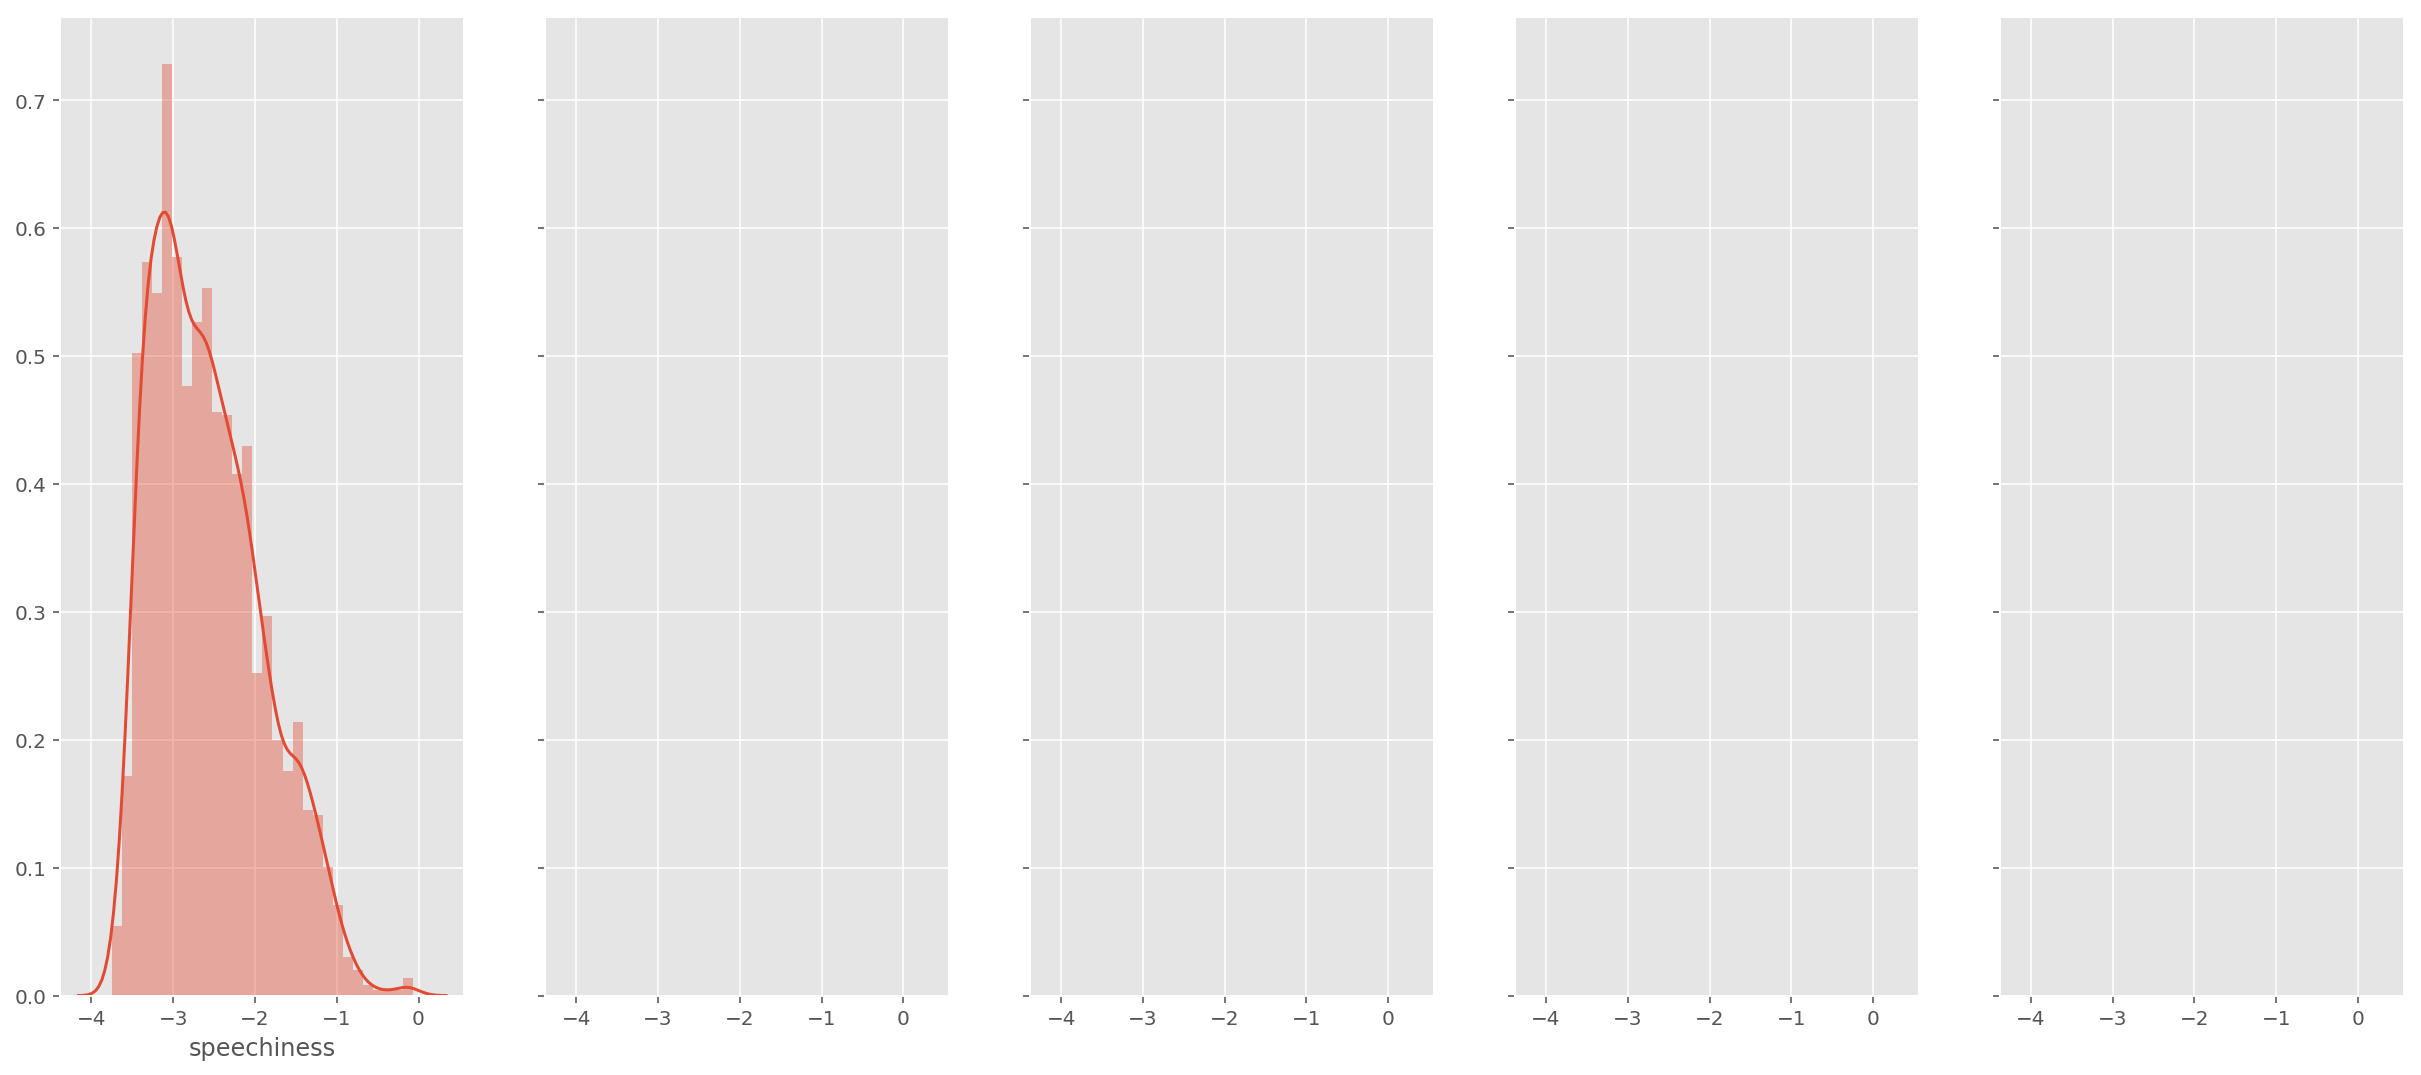

In [60]:
f, axes = subplots(1, 5, figsize=(21, 9), sharex=True, sharey = True)

sns.distplot(np.log(df[df.target == 1][df.columns[3]]), ax = axes[0]);
sns.distplot(np.log(df[df.target == 0][df.columns[3]]), ax = axes[0]);

sns.distplot(np.log(df[df.target == 1][df.columns[4]]), ax = axes[1]);
sns.distplot(np.log(df[df.target == 0][df.columns[4]]), ax = axes[1]);

sns.distplot(df[df.target == 1][df.columns[5]], ax = axes[2]);
sns.distplot(df[df.target == 0][df.columns[5]], ax = axes[2]);

sns.distplot(np.log(df[df.target == 1][df.columns[6]]), ax = axes[3]);
sns.distplot(np.log(df[df.target == 0][df.columns[6]]), ax = axes[3]);

sns.distplot(np.log(df[df.target == 1][df.columns[7]]), ax = axes[4]);
sns.distplot(np.log(df[df.target == 0][df.columns[7]]), ax = axes[4]);

suptitle('Kpop vs Apop 2', fontsize = 30);

# Modeling to differentiate kpop with apop

In [12]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
import shap
from itertools import combinations


In [61]:
df = df.drop('artist_name', 1)

In [63]:
X_train, X_validation, y_train, y_validation = train_test_split(df.iloc[:,:-1], df.target, train_size=0.2)

X_train_lgbm = pd.get_dummies(X_train)
X_validation_lgbm = pd.get_dummies(X_validation)

In [64]:
X_train_lgbm.reset_index(inplace = True)
X_validation_lgbm.reset_index(inplace = True)

sm = SMOTE()

X_train_smote, y_train_smote = sm.fit_sample(X_train_lgbm, y_train.ravel())
X_validation_smote, y_validation_smote = sm.fit_sample(X_validation_lgbm, y_validation.ravel())

X_train_smote = pd.DataFrame(X_train_smote, columns = X_train_lgbm.columns).set_index('index')
X_validation_smote = pd.DataFrame(X_validation_smote, columns = X_validation_lgbm.columns).set_index('index')


model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.01,
                                   reg_alpha = 0.1, reg_lambda = 0.1, silent=True,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
model.fit(X_train_smote, y_train_smote,
           eval_set=[(X_validation_smote, y_validation_smote)],
           early_stopping_rounds=100,
eval_metric='auc',
verbose=200,)


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's binary_logloss: 0.455817	valid_0's auc: 0.876904
[400]	valid_0's binary_logloss: 0.409156	valid_0's auc: 0.898673
[600]	valid_0's binary_logloss: 0.391558	valid_0's auc: 0.909778
[800]	valid_0's binary_logloss: 0.38825	valid_0's auc: 0.914427
Early stopping, best iteration is:
[839]	valid_0's binary_logloss: 0.38785	valid_0's auc: 0.915341


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.01,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=50, reg_alpha=0.1, reg_lambda=0.1,
        silent=True, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=0)

In [65]:
validation_pred_proba_grad = model.predict_proba(X_validation_smote)
roc_auc_score(y_validation_smote, validation_pred_proba_grad[:,1])

0.9153414226867918

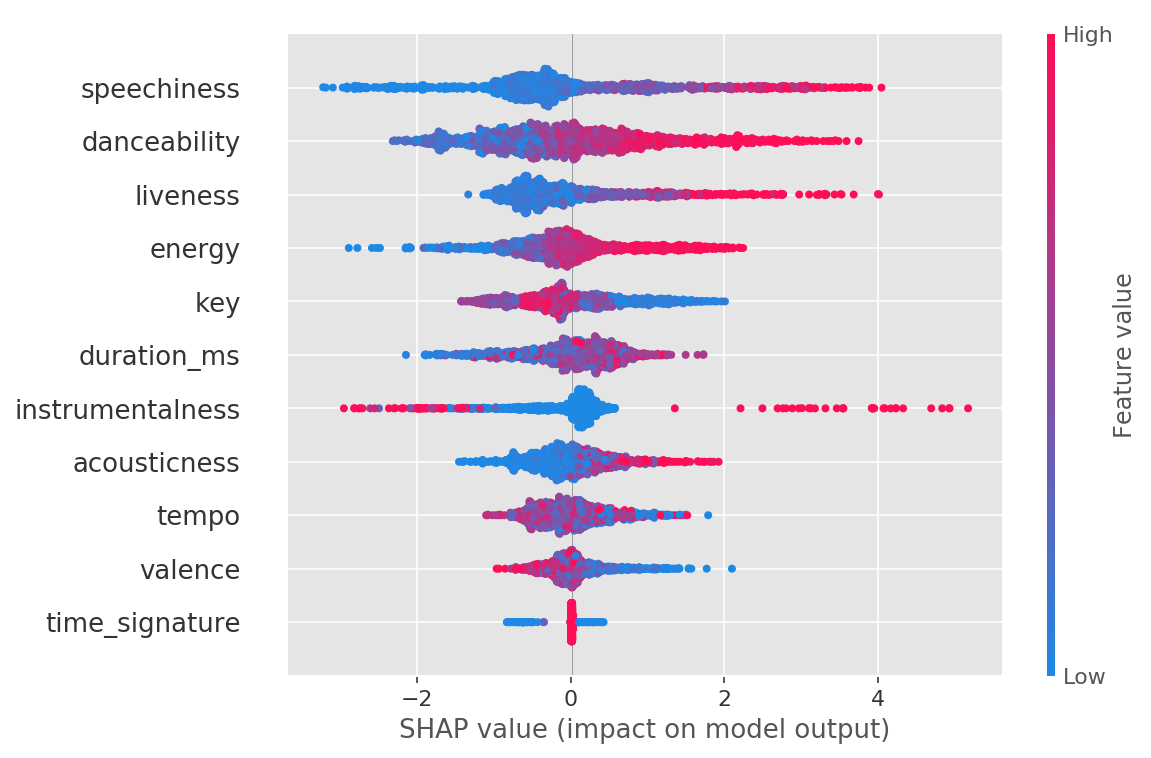

In [66]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_smote)

shap.summary_plot(shap_values, X_train_smote)

# Featuretools

In [6]:
import featuretools as ft
import featuretools.variable_types as vtypes

es = ft.EntitySet(id = 'passengers')

In [7]:
y = df.target
df = df.drop('target', 1)


In [18]:
for i in df:
    if df[i].dtypes == uint8:
        df[i] = df[i].astype(int)

In [19]:
df_types = {}

for col in df:
    if (df[col].nunique() == 2) and (df[col].dtype == int or df[col].dtype == float):
        df_types[col] = vtypes.Boolean
    elif (df[col].nunique() != 2) and (df[col].dtype == int or df[col].dtype == float):
        df_types[col] = vtypes.Numeric
        
df_types['key'] = vtypes.Ordinal

In [20]:
df_types

{'indices': featuretools.variable_types.variable.Numeric,
 'danceability': featuretools.variable_types.variable.Numeric,
 'energy': featuretools.variable_types.variable.Numeric,
 'key': featuretools.variable_types.variable.Ordinal,
 'speechiness': featuretools.variable_types.variable.Numeric,
 'acousticness': featuretools.variable_types.variable.Numeric,
 'instrumentalness': featuretools.variable_types.variable.Numeric,
 'liveness': featuretools.variable_types.variable.Numeric,
 'valence': featuretools.variable_types.variable.Numeric,
 'tempo': featuretools.variable_types.variable.Numeric,
 'duration_ms': featuretools.variable_types.variable.Numeric,
 'time_signature': featuretools.variable_types.variable.Numeric,
 'target': featuretools.variable_types.variable.Boolean}

In [21]:
es = es.entity_from_dataframe(entity_id = 'df', dataframe = df, variable_types = df_types, index = 'indices')

In [22]:
es

Entityset: passengers
  Entities:
    df [Rows: 5420, Columns: 14]
  Relationships:
    No relationships

In [28]:
primitives = ft.list_primitives()

print('List of transformation primitives: {}'.format(list(primitives[primitives['type'] == 'transform'].name.values)))

List of transformation primitives: ['month', 'or', 'days_since', 'haversine', 'week', 'multiply', 'time_since_previous', 'latitude', 'numwords', 'minute', 'cum_max', 'add', 'is_null', 'negate', 'diff', 'weekday', 'second', 'cum_mean', 'years', 'hour', 'percentile', 'months', 'day', 'cum_sum', 'isin', 'weeks', 'divide', 'and', 'longitude', 'time_since', 'minutes', 'cum_min', 'absolute', 'subtract', 'not', 'characters', 'seconds', 'cum_count', 'mod', 'weekend', 'hours', 'year', 'days']


In [34]:
agg_primitives = primitives[primitives['type'] == 'aggregation'].name.values
trans_primitives = ['percentile', 'and', 'or','subtract']


# 6. Deep Feature Synthesis (DFS) to create with specified primitives
feature_names = ft.dfs(entityset = es, target_entity = 'df',
                       trans_primitives = trans_primitives,
                       agg_primitives= agg_primitives, 
                       where_primitives = [], seed_features = [],
                       max_depth = 2, n_jobs = -1, verbose = 1,
                       features_only=True)

Built 403 features


In [35]:
# 7. Store new features into a matrix
feature_matrix = ft.calculate_feature_matrix(feature_names, 
                                                 entityset=es, 
                                                 n_jobs = 1, 
                                                 verbose = 0,
                                                 chunk_size = es['df'].df.shape[0])

In [39]:
feature_matrix.shape

(5420, 403)

In [40]:
feature_matrix.head()

,artist_name,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,target,PERCENTILE(danceability),PERCENTILE(energy),PERCENTILE(speechiness),PERCENTILE(acousticness),PERCENTILE(instrumentalness),PERCENTILE(liveness),PERCENTILE(valence),PERCENTILE(tempo),PERCENTILE(duration_ms),PERCENTILE(time_signature),danceability - acousticness,speechiness - duration_ms,energy - time_signature,acousticness - time_signature,duration_ms - valence,danceability - valence,speechiness - valence,liveness - duration_ms,tempo - instrumentalness,instrumentalness - tempo,energy - duration_ms,energy - instrumentalness,acousticness - valence,acousticness - duration_ms,tempo - valence,energy - speechiness,duration_ms - energy,valence - acousticness,speechiness - tempo,acousticness - tempo,speechiness - danceability,danceability - tempo,duration_ms - instrumentalness,time_signature - valence,acousticness - energy,instrumentalness - duration_ms,energy - tempo,...,PERCENTILE(energy) - valence,PERCENTILE(tempo) - PERCENTILE(danceability),valence - PERCENTILE(time_signature),tempo - PERCENTILE(valence),duration_ms - PERCENTILE(speechiness),PERCENTILE(acousticness) - PERCENTILE(speechiness),PERCENTILE(instrumentalness) - PERCENTILE(acousticness),PERCENTILE(danceability) - energy,PERCENTILE(energy) - energy,speechiness - PERCENTILE(duration_ms),liveness - PERCENTILE(acousticness),acousticness - PERCENTILE(danceability),PERCENTILE(duration_ms) - PERCENTILE(speechiness),PERCENTILE(valence) - PERCENTILE(speechiness),PERCENTILE(tempo) - instrumentalness,PERCENTILE(energy) - duration_ms,liveness - PERCENTILE(tempo),PERCENTILE(liveness) - PERCENTILE(danceability),PERCENTILE(instrumentalness) - PERCENTILE(duration_ms),PERCENTILE(acousticness) - speechiness,PERCENTILE(danceability) - acousticness,PERCENTILE(time_signature) - acousticness,PERCENTILE(instrumentalness) - time_signature,PERCENTILE(instrumentalness) - duration_ms,PERCENTILE(tempo) - tempo,acousticness - PERCENTILE(tempo),PERCENTILE(speechiness) - PERCENTILE(duration_ms),PERCENTILE(duration_ms) - acousticness,energy - PERCENTILE(liveness),PERCENTILE(acousticness) - valence,PERCENTILE(acousticness) - danceability,PERCENTILE(instrumentalness) - PERCENTILE(danceability),instrumentalness - PERCENTILE(time_signature),PERCENTILE(danceability) - PERCENTILE(speechiness),PERCENTILE(tempo) - PERCENTILE(acousticness),PERCENTILE(acousticness) - tempo,PERCENTILE(time_signature) - instrumentalness,PERCENTILE(danceability) - instrumentalness,valence - PERCENTILE(duration_ms),valence - PERCENTILE(energy),energy - PERCENTILE(time_signature),PERCENTILE(valence) - acousticness,PERCENTILE(valence) - PERCENTILE(energy),PERCENTILE(duration_ms) - PERCENTILE(energy),PERCENTILE(valence) - liveness,PERCENTILE(instrumentalness) - liveness,PERCENTILE(speechiness) - instrumentalness,instrumentalness - PERCENTILE(liveness),PERCENTILE(tempo) - energy,PERCENTILE(liveness) - valence
indices,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,red velvet,0.714,0.736,2,0.0457,0.1910,0.000000,0.0553,0.814,149.985,210818,4,1,0.765590,0.320849,0.346494,0.724631,0.372140,0.038469,0.886624,0.868635,0.355904,0.513284,0.5230,-210817.9543,-3.264,-3.8090,210817.186,-0.100,-0.7683,-210817.9447,149.985000,-149.985000,-210817.264,0.736000,-0.6230,-210817.8090,149.171,0.6903,210817.264,0.6230,-149.9393,-149.7940,-0.6683,-149.271,210818.000000,3.186,-0.5450,-210818.000000,-149.249,...,-0.493151,0.103044,0.300716,149.098376,210817.653506,0.378137,-0.352491,0.029590,-0.415151,-0.310204,-0.669331,-0.574590,0.009410,0.540129,0.868635,-210817.679151,-0.813335,-0.727122,0.016236,0.678931,0.574590,0.322284,-3.627860,-210817.627860,-149.116365,-0.677635,-0.009410,0.164904,0.697531,-0.089369,0.010631,-0.393450,-0.513284,0.419096,0.144004,-149.260369,0.513284,0.765590,0.458096,0.493151,0.222716,0.695624,0.565775,0.035055,0.831324,0.316840,0.346494,-0.0384

In [44]:
y = feature_matrix.target
feature_matrix = feature_matrix.drop('target',1) 

In [47]:
feature_matrix = feature_matrix.drop('artist_name', 1)

In [50]:
X_train, X_validation, y_train, y_validation = train_test_split(feature_matrix, y, train_size=0.2)

X_train_lgbm = pd.get_dummies(X_train)
X_validation_lgbm = pd.get_dummies(X_validation)

In [53]:
X_train_lgbm.reset_index(inplace = True)
X_validation_lgbm.reset_index(inplace = True)

sm = SMOTE()

X_train_smote, y_train_smote = sm.fit_sample(X_train_lgbm, y_train.ravel())
X_validation_smote, y_validation_smote = sm.fit_sample(X_validation_lgbm, y_validation.ravel())

X_train_smote = pd.DataFrame(X_train_smote, columns = X_train_lgbm.columns).set_index('indices')
X_validation_smote = pd.DataFrame(X_validation_smote, columns = X_validation_lgbm.columns).set_index('index')


model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.01,
                                   reg_alpha = 0.1, reg_lambda = 0.1, silent=True,
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
model.fit(X_train_smote, y_train_smote,
           eval_set=[(X_validation_smote, y_validation_smote)],
           early_stopping_rounds=100,
eval_metric='auc',
verbose=200,)


Training until validation scores don't improve for 100 rounds.
[200]	valid_0's auc: 0.906985	valid_0's binary_logloss: 0.421228
[400]	valid_0's auc: 0.92378	valid_0's binary_logloss: 0.369891
[600]	valid_0's auc: 0.930191	valid_0's binary_logloss: 0.358997
Early stopping, best iteration is:
[554]	valid_0's auc: 0.929627	valid_0's binary_logloss: 0.358133


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=1.0, importance_type='split', learning_rate=0.01,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=31,
        objective='binary', random_state=50, reg_alpha=0.1, reg_lambda=0.1,
        silent=True, subsample=0.8, subsample_for_bin=200000,
        subsample_freq=0)

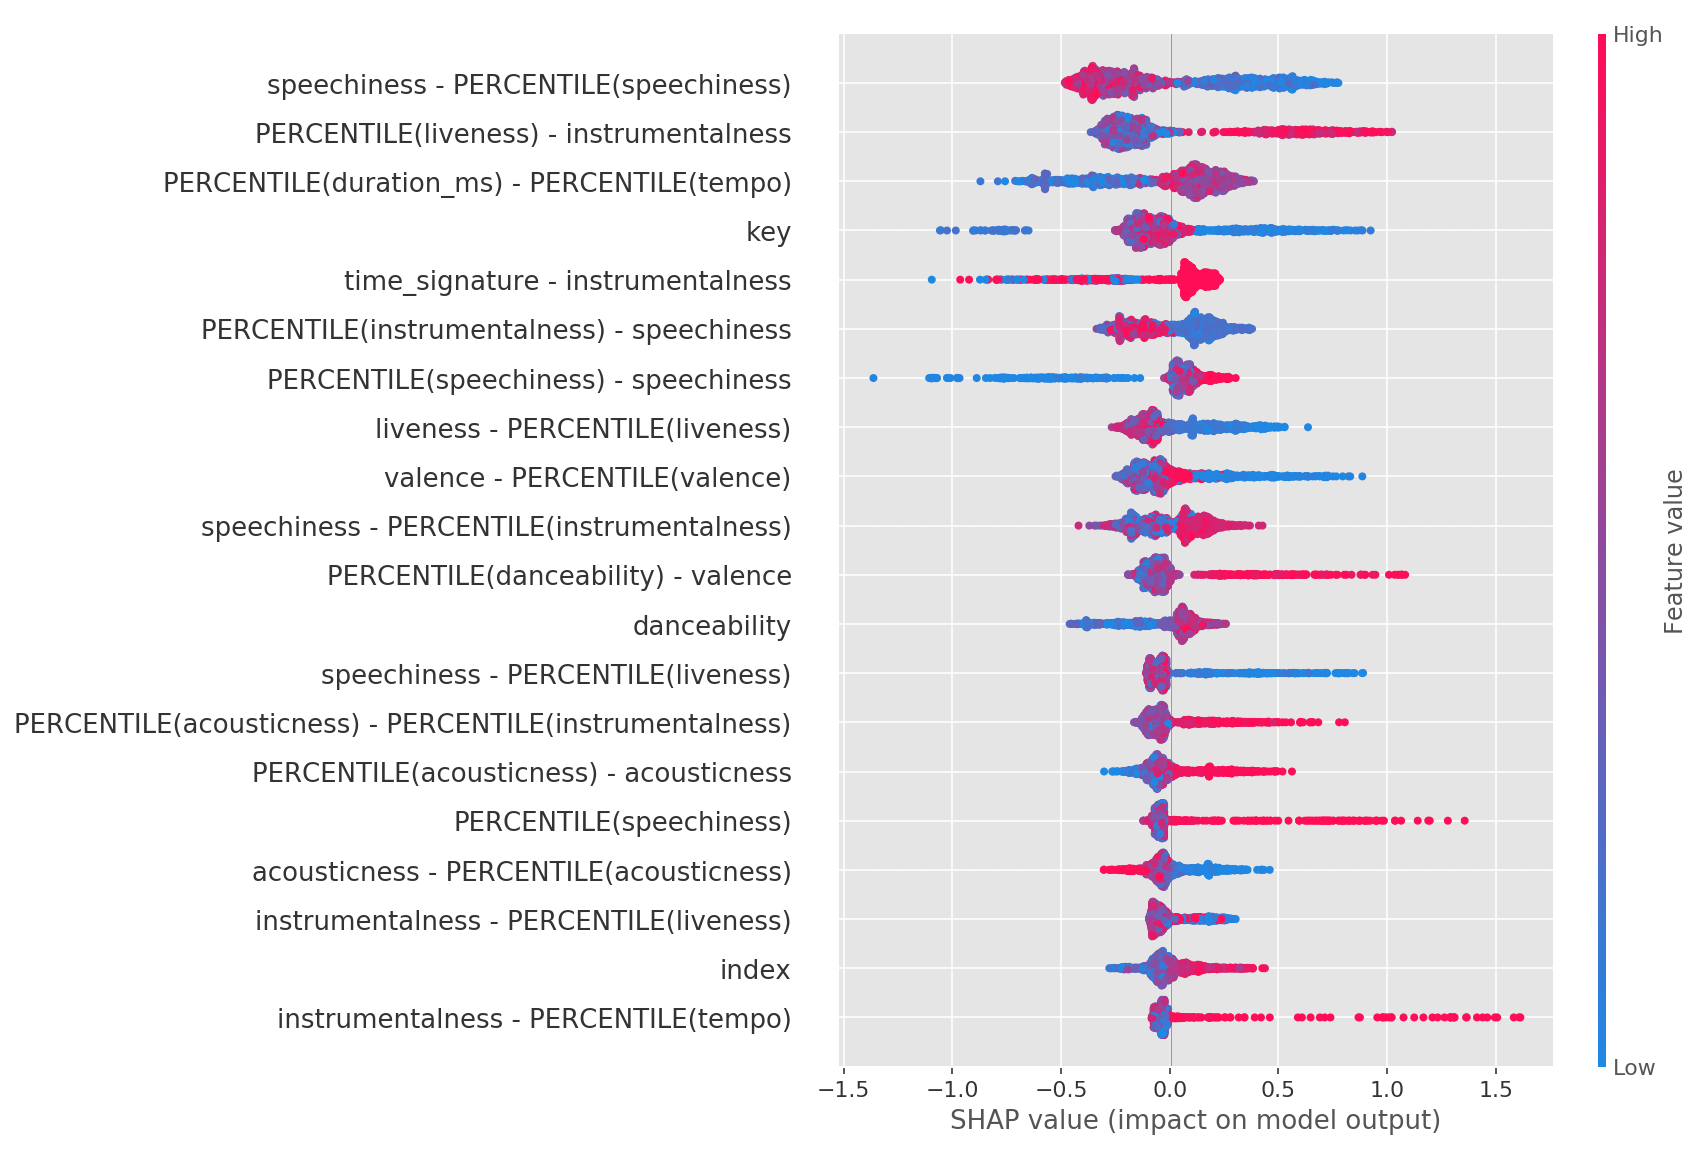

In [54]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_smote)

shap.summary_plot(shap_values, X_train_smote)